# City of Los Angeles - Job Bulletins/Descriptions

### Helping the City of Los Angeles to Structure and Analyze its Job Descriptions Using Natural Langauge Processing

The City of Los Angeles faces a big hiring challenge: 1/3 of its 50,000 workers are eligible to retire by July of 2020. The city has partnered with Kaggle to create a competition to improve the job bulletins that will fill all those open positions.

### Problem Statement

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to: (1) identify language that can negatively bias the pool of applicants; (2) improve the diversity and quality of the applicant pool; and/or (3) make it easier to determine which promotions are available to employees in each job class.

Processing Methods
* Tokenization
* Pre-Processing:
    * Stop Words
    * Regular Expression
* Parts-of-Speech (POS) Tagging
* Frequency Distribution
* Word Cloud
* Readability Index
* TF-IDF (Term Frequency-Inverse Document Frequency)
* Watson Natural Language Classifier (TBD)

In [1]:
# Dependencies & Setup
import os, glob, sys
import pandas as pd
import numpy as np
import nltk
import nltk.corpus

In [15]:
# Open & Read All Job Bulletin Files in Directory
all_files = os.listdir("data/Job Bulletins")
all_contents = []

for files in all_files:
    if files.endswith(".txt"):
        f = open("data/Job Bulletins/" + str(files), 'r', encoding ="ISO-8859-1");
#         file = open('../Resources/' + filename, 'r', encoding="ISO-8859-1");
        all_contents.append(f.read())
    
    

In [17]:
# Make Sure All Files are Read by Indexing to Verify
print(all_contents[135])


DRILL RIG OPERATOR
Class Code:      3521
Open Date: 03-30-18
(Exam Open to All, including Current City Employees)

ANNUAL SALARY

$61,554 to $89,993 

NOTE:

Annual salary is the beginning of the pay range. The current salary range is subject to change. Please confirm the starting salary with the hiring department before accepting a job offer.

DUTIES

A Drill Rig Operator operates hydraulic, mechanical, and percussion drilling equipment to drill through soil and rock for engineering and construction projects or to extract soil samples for laboratory testing.

REQUIREMENTS/MINIMUM QUALIFICATIONS

1. Two years of full-time paid experience in the operation or assisting in the operation of hydraulic, mechanical or percussion drilling equipment to drill through soil and rock for engineering and construction projects or to extract soil samples for laboratory testing; and
2. A valid California Class A or B driver's license with a tank (N) endorsement and a valid medical certificate approved 

### Tokenization

* The process of breaking up strings into Tokens (small structures & units)
    * Break complex sentence into words
    * Understand the importance of each of the words with respect to the sentence
    * Produce a structural description on an input sentence

In [18]:
# Convert List of All Job Bulletin Files to String
all_contents_str = str(all_contents)
type(all_contents_str)

str

In [19]:
# Convert Text of All Job Bulletin Files to lower case to Keep Consistent
all_contents_str = all_contents_str.lower()

In [20]:
# Tokenize Words in Job Bulletin Files
from nltk.tokenize import word_tokenize

contents_tokens = word_tokenize(all_contents_str)
len(contents_tokens)

1187045

#### Stop Words
* A stop word is a commonly used word (such as "and", "the", "a", "an", and similar words) that are irrelevant and have very little meaning

In [21]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Filter & Remove Stop Words (Pre-Processing)
stop = set(stopwords.words("english"))
contents_tokens_list1 = []
for token in contents_tokens:
    if token not in stop:
        contents_tokens_list1.append(token)
len(contents_tokens_list1)


848853

In [23]:
import string
characters = string.punctuation
characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Remove All Characters & Punctuations from Strings Using Regular Expression
import re

punctuation = re.compile(r'[\\\n\$#-.?!,":;()|0-9|`/]')
contents_tokens_list2 = []
for token in contents_tokens_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        contents_tokens_list2.append(word)
len(contents_tokens_list2)

553567

### Part-of-Speech (POS) Tags
* Part-of-speech tags are assigned to a single word according to its role in the sentence. 
* Process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context—i.e., its relationship with adjacent and related words in a phrase, sentence, or paragraph.
* Traditional grammar classifies words based on eight parts of speech: the verb (VB), the noun (NN), the pronoun (PR+DT), the adjective (JJ), the adverb (RB), the preposition (IN), the conjunction (CC), and the interjection (UH)

In [27]:
# POS Tags to All Words & Convert Them to a Pandas DataFrame to Get the Count of All POS Tags
tokens_pos_tag = nltk.pos_tag(contents_tokens_list2)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ("word","POS"))
pos_sum = pos_df.groupby("POS", as_index=False).count()
tagged = pos_sum.sort_values(["word"], ascending=[False])
tagged.head()


,POS,word
10,NN,211484
6,JJ,108206
13,NNS,83283
26,VBG,27185
28,VBP,24811


In [28]:
# Filter the Nouns (Most Important Words) & Remove All Other POS Tags, such as Adjectives, Verbs, Adverbs etc.
filtered_pos = []
for one in tokens_pos_tag:
    if one[1] == "NN" or one[1] == "NNS" or one[1] == "NNP" or one[1] == "NNPS":
# Tested Verbs but Useless: "VBG" or one[1] == "VPB" or one[1] == "VBN" or one[1] == "VBD" or one[1] == "VB" or one[1] == "VBZ"
        filtered_pos.append(one)
len(filtered_pos)

295161

### Frequency Distribution

In [29]:
# Use NLTK’s FreqDist() to Get the Frequency Distribution of the Words, then Select the Top-100 Words
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(150)
print(top_100_words)

[(('city', 'NN'), 8817), (('candidates', 'NNS'), 5503), (('applicants', 'NNS'), 4510), (('examination', 'NN'), 4288), (('experience', 'NN'), 3976), (('angeles', 'NNS'), 3873), (('los', 'NN'), 3801), (('time', 'NN'), 3669), (('qualifications', 'NNS'), 3451), (('disability', 'NN'), 3401), (('interview', 'NN'), 3194), (('employment', 'NN'), 2960), (('department', 'NN'), 2856), (('application', 'NN'), 2638), (('job', 'NN'), 2505), (('service', 'NN'), 2485), (('test', 'NN'), 2394), (('list', 'NN'), 2270), (('candidate', 'NN'), 2080), (('information', 'NN'), 2041), (('accommodation', 'NN'), 2036), (('work', 'NN'), 2025), (('score', 'NN'), 1931), (('positions', 'NNS'), 1860), (('code', 'NN'), 1829), (('basis', 'NN'), 1726), (('form', 'NN'), 1724), (('applications', 'NNS'), 1720), (('position', 'NN'), 1666), (('personnel', 'NNS'), 1637), (('review', 'NN'), 1538), (('opportunity', 'NN'), 1474), (('date', 'NN'), 1469), (('months', 'NNS'), 1410), (('rule', 'NN'), 1370), (('employees', 'NNS'), 136

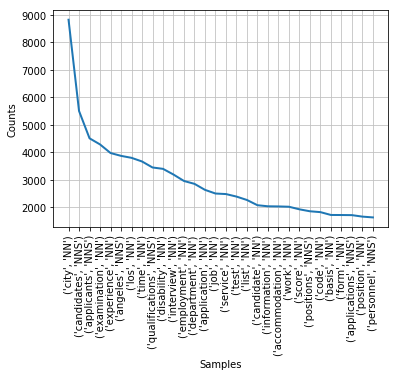

In [30]:
# Plot the Most Frequency Used Words (Nouns) 
import matplotlib.pyplot as plt
%matplotlib inline

fdist_pos.plot(30,cumulative=False)
plt.show()


In [31]:
# Convert the List Into a DataFrame to Clean
top_words_df = pd.DataFrame(top_100_words, columns = ("pos","count"))
top_words_df["Word"] = top_words_df["pos"].apply(lambda x: x[0]) 
top_words_df = top_words_df.drop("pos", 1)
top_words_df.head()

,count,Word
0,8817,city
1,5503,candidates
2,4510,applicants
3,4288,examination
4,3976,experience


In [32]:
top_words_df.head(10)

,count,Word
0,8817,city
1,5503,candidates
2,4510,applicants
3,4288,examination
4,3976,experience
5,3873,angeles
6,3801,los
7,3669,time
8,3451,qualifications
9,3401,disability


In [38]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 3.9MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


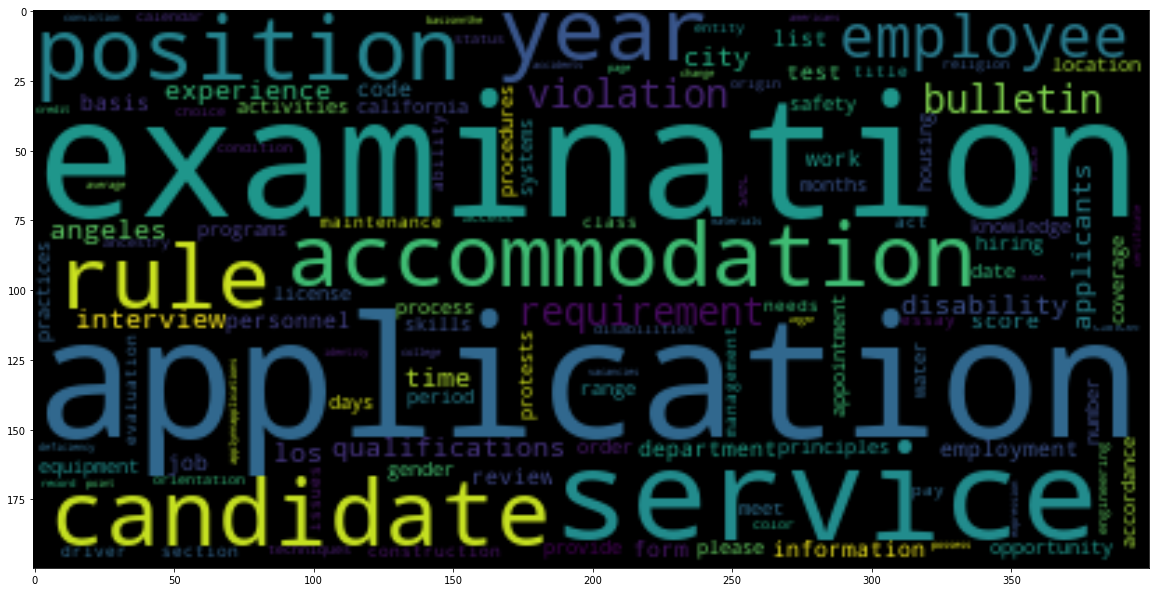

In [41]:
# Use Wordcloud and Matplotlib Libraries to present In Form of a Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

subset_pos = top_words_df[["Word", "count"]]
tuples_pos = [x[0] for x in subset_pos.values]
text = " ".join(tuples_pos)
wordcloud = WordCloud()
wordcloud.generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### Bigrams

In [43]:
# Most Frequent Phrases - Most Frequent Bigrams (2 words)
bgs = nltk.bigrams(contents_tokens)
# Select Bigrams from Tokens
fdist2 = nltk.FreqDist(bgs)
# Top-100 Bigrams
bgs_100 = fdist2.most_common(100)
bgs_df = pd.DataFrame(bgs_100, columns = ("bigram","count"))
bgs_df.head()

,bigram,count
0,"(., .)",150354
1,"(of, the)",8791
2,"(,, and)",7204
3,"(will, be)",5961
4,"(in, the)",5538


In [44]:
# Merging the Tuple into a String
bgs_df["phrase"] = bgs_df["bigram"].apply(lambda x: x[0]+" "+ x[1]) 
# Find Strings with Numbers & Punctuations
bgs_df["filter_bgs"] = bgs_df["phrase"].str.contains(punctuation) 
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(., .)",150354,. .,True
1,"(of, the)",8791,of the,False
2,"(,, and)",7204,", and",True
3,"(will, be)",5961,will be,False
4,"(in, the)",5538,in the,False


In [45]:
# Remove Strings with Numbers & Punctuations
bgs_df = bgs_df[bgs_df.filter_bgs == False]
bgs_df = bgs_df.drop("bigram", 1)
# Remove Excess Columns
bgs_df = bgs_df.drop("filter_bgs", 1)
bgs_df.reset_index()
#Final Bigrams
bgs_df.head(10) 

,count,phrase
1,8791,of the
3,5961,will be
4,5538,in the
5,4475,los angeles
6,3921,the city
7,3660,to the
8,3513,on the
9,3423,of los
10,3391,city of
11,3126,may be


#### Trigrams

In [46]:
# Most Frequent Phrases - Most Frequent Trigrams (3 words)
tgs = nltk.trigrams(contents_tokens)
# Select Trigrams from Tokens
fdist3 = nltk.FreqDist(tgs)
# Top-100 Trigrams
tgs_100 = fdist3.most_common(100)
tgs_df = pd.DataFrame(tgs_100, columns = ("trigram","count"))
tgs_df.head()

,trigram,count
0,"(., ., .)",148288
1,"(city, of, los)",3390
2,"(of, los, angeles)",3355
3,"(the, city, of)",2374
4,"(will, not, be)",1817


In [47]:
# Merge the Tuple into a String
tgs_df["phrase"] = tgs_df["trigram"].apply(lambda x: x[0]+" "+x[1]+" "+x[2])
# Find Strings with Numbers & Punctuations
tgs_df["filter_tgs"] = tgs_df["phrase"].str.contains(punctuation)
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(., ., .)",148288,. . .,True
1,"(city, of, los)",3390,city of los,False
2,"(of, los, angeles)",3355,of los angeles,False
3,"(the, city, of)",2374,the city of,False
4,"(will, not, be)",1817,will not be,False


In [48]:
# Remove Strings with Numbers & Punctuations
tgs_df = tgs_df[tgs_df.filter_tgs == False]
tgs_df = tgs_df.drop("trigram", 1)
# Remove Excess Columns
tgs_df = tgs_df.drop("filter_tgs", 1)
tgs_df.reset_index()
tgs_df.head(20) 

,count,phrase
1,3390,city of los
2,3355,of los angeles
3,2374,the city of
4,1817,will not be
5,1455,equal employment opportunity
6,1391,the basis of
7,1390,on the basis
8,1366,los angeles does
9,1366,angeles does not
10,1366,does not discriminate


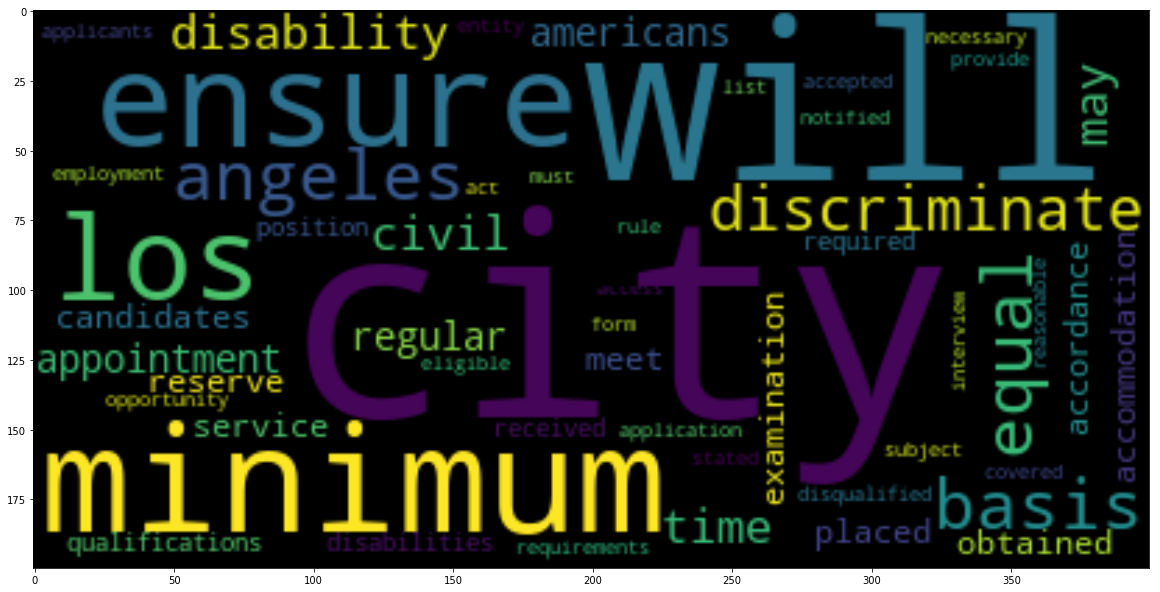

In [49]:
# Word Cloud for Trigrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

subset_pos = tgs_df[["phrase", "count"]]
tuples_pos = [x[0] for x in subset_pos.values]
text = " ".join(tuples_pos)
wordcloud = WordCloud()
wordcloud.generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

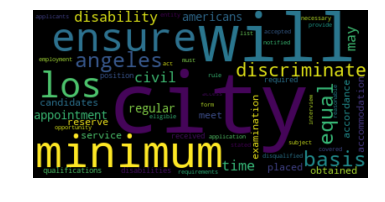

In [50]:
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/musafirikayambi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/musafirikayambi/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [62]:
# NER: Named Entity Recognition
import nltk
from nltk import ne_chunk
ne_tags = nltk.pos_tag(contents_tokens_list2)
ne_ner = ne_chunk(ne_tags)
print(ne_ner)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Readibility Index
* Readability is the ease with which a reader can understand a written text. 
* In natural language, the readability of text depends on its content (the complexity of its vocabulary and syntax). It focuses on the words we choose, and how we put them into sentences and paragraphs for the readers to comprehend

In [63]:
# Calculate Statistics from Text to Determine Readability, Complexity and Grade Level of a Particular Corpus
import textstat

# Open All Files in Directory
all_contents = []

for files in all_files:
    if files.endswith(".txt"):
        flo = open("data/Job Bulletins/" + str(files), "r")
        test_data = flo.read()
        a = textstat.flesch_reading_ease(test_data)
        b = textstat.smog_index(test_data)
        c = textstat.flesch_kincaid_grade(test_data)
        d = textstat.coleman_liau_index(test_data)
        e = textstat.automated_readability_index(test_data)
        f = textstat.dale_chall_readability_score(test_data)
        g = textstat.difficult_words(test_data)
        h = textstat.linsear_write_formula(test_data)
        i = textstat.gunning_fog(test_data)
        j = textstat.text_standard(test_data)
        k = textstat.syllable_count(test_data, lang='en_US')
        l = textstat.lexicon_count(test_data, removepunct=True)
        m = textstat.gunning_fog(test_data)
        n = textstat.text_standard(test_data, float_output=False)
        all_contents.append({str(files): f})
        print(f"Dale-Chall Readability Score: {f}(Grade Level)")
        print(f"Flesch Reading Ease Score: {a}(Difficulty Level)")

ModuleNotFoundError: No module named 'textstat'

In [ ]:
test_data = ("data/Job Bulletins/ACCOUNTANT 1513 062218.txt")

a = textstat.flesch_reading_ease(test_data)
'''Score	Difficulty
90-100	Very Easy
80-89	Easy
70-79	Fairly Easy
60-69	Standard
50-59	Fairly Difficult
30-49	Difficult
0-29	Very Confusing
'''

b = textstat.smog_index(test_data)
c = textstat.flesch_kincaid_grade(test_data)
d = textstat.coleman_liau_index(test_data)
e = textstat.automated_readability_index(test_data)

f = textstat.dale_chall_readability_score(test_data)
'''Score	Understood by
4.9 or lower	average 4th-grade student or lower
5.0–5.9	average 5th or 6th-grade student
6.0–6.9	average 7th or 8th-grade student
7.0–7.9	average 9th or 10th-grade student
8.0–8.9	average 11th or 12th-grade student
9.0–9.9	average 13th to 15th-grade (college) student
'''

g = textstat.difficult_words(test_data)
h = textstat.linsear_write_formula(test_data)
i = textstat.gunning_fog(test_data)
j = textstat.text_standard(test_data)
k = textstat.syllable_count(text, lang='en_US')
l = textstat.lexicon_count(text, removepunct=True)
m = textstat.gunning_fog(text)
n = textstat.text_standard(text, float_output=False)

### TF-IDF (Term Frequency-Inverse Document Frequency) 
* A technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus
* It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. 
    * So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

In [ ]:
# Kills Kernel DO NOT RUN!!
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    return stems

# The Corpus
text = contents_tokens_list2
# Word Tokenize & Stem
text = [" ".join(tokenize(txt.lower())) for txt in text]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text).todense()
# Transform the Matrix to a Pandas DataFrame
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
# Sum Over Each Document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# All Files - Calculate TF-IDF (Term Frequency–Inverse Document Frequency)

sentences = list()
file = contents_tokens_list2

for line in file:
    for l in re.split(r"\.\s|\?\s|\!\s|\n",line):
        if l:
            sentences.append(l)

cvec = CountVectorizer(stop_words="english", min_df=3, max_df=0.5, ngram_range=(1,2))
sf = cvec.fit_transform(sentences)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({"term": cvec.get_feature_names(), "weight": weights})

weights_df.sort_values(by="weight", ascending=False).head(10)

In [ ]:
# One File - Calculate TF-IDF (Term Frequency–Inverse Document Frequency)

sentences = list()

with open("data/Job Bulletins/ACCOUNTANT 1513 062218.txt") as file:
    for line in file:
        for l in re.split(r"\.\s|\?\s|\!\s|\n",line):
            if l:
                sentences.append(l)

cvec = CountVectorizer(stop_words="english", min_df=3, max_df=0.5, ngram_range=(1,2))
sf = cvec.fit_transform(sentences)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({"term": cvec.get_feature_names(), "weight": weights})

weights_df.sort_values(by="weight", ascending=False).head(10)


### Watson Natural Language Classifier
* https://natural-language-classifier-demo.ng.bluemix.net/
* Applies deep learning techniques to make predictions about the best predefined classes for short sentences or phrases